In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/dataset.zip" -d "/content/drive/MyDrive/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_1020.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_0458.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_0504.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_0262.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_0276.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_1168.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_0510.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_0538.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_1140.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_1154.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_1183.jpg  
  inflating: /content/drive/MyDrive/dataset/Training/notumor/Tr-no_1197.jpg  
  inflating: 

In [1]:
#OS libs
import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data_path = '/content/drive/MyDrive/dataset/Training'

filepaths =[]
labels =[]

folds = os.listdir(train_data_path)

for fold in folds:
  f_path = os.path.join(train_data_path, fold)
  if os.path.isdir(f_path):
    filelists = os.listdir(f_path)

  for file in filelists:
    filepaths.append(os.path.join(f_path, file))
    labels.append(fold)

#Concat data path with labels
Fseries = pd.Series(filepaths, name = 'filepaths')
Lseries = pd.Series(labels, name = 'label')
train_df = pd.concat([Fseries, Lseries], axis = 1)


In [3]:
train_df

,filepaths,label
0,/content/drive/MyDrive/dataset/Training/pituit...,pituitary
1,/content/drive/MyDrive/dataset/Training/pituit...,pituitary
2,/content/drive/MyDrive/dataset/Training/pituit...,pituitary
3,/content/drive/MyDrive/dataset/Training/pituit...,pituitary
4,/content/drive/MyDrive/dataset/Training/pituit...,pituitary
...,...,...
7164,/content/drive/MyDrive/dataset/Training/mening...,meningioma
7165,/content/drive/MyDrive/dataset/Training/mening...,meningioma
7166,/content/drive/MyDrive/dataset/Training/mening...,meningioma
7167,/content/drive/MyDrive/dataset/Training/mening...,meningioma


In [4]:
test_data_path = '/content/drive/MyDrive/dataset/Testing'

filepaths =[]
labels =[]

folds = os.listdir(test_data_path)

for fold in folds:
  f_path = os.path.join(test_data_path, fold)
  if os.path.isdir(f_path):
    filelists = os.listdir(f_path)

  for file in filelists:
    filepaths.append(os.path.join(f_path, file))
    labels.append(fold)

#Concat data path with labels
Fseries = pd.Series(filepaths, name = 'filepaths')
Lseries = pd.Series(labels, name = 'label')
test_df = pd.concat([Fseries, Lseries], axis = 1)


In [5]:
test_df

,filepaths,label
0,/content/drive/MyDrive/dataset/Testing/pituita...,pituitary
1,/content/drive/MyDrive/dataset/Testing/pituita...,pituitary
2,/content/drive/MyDrive/dataset/Testing/pituita...,pituitary
3,/content/drive/MyDrive/dataset/Testing/pituita...,pituitary
4,/content/drive/MyDrive/dataset/Testing/pituita...,pituitary
...,...,...
1606,/content/drive/MyDrive/dataset/Testing/meningi...,meningioma
1607,/content/drive/MyDrive/dataset/Testing/meningi...,meningioma
1608,/content/drive/MyDrive/dataset/Testing/meningi...,meningioma
1609,/content/drive/MyDrive/dataset/Testing/meningi...,meningioma


In [6]:
valid, test = train_test_split(test_df, train_size = 0.5, shuffle = True, random_state = 42)

In [7]:
img_size = (224 ,244)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 676 validated image filenames belonging to 4 classes.
Found 635 validated image filenames belonging to 4 classes.


show image and labels

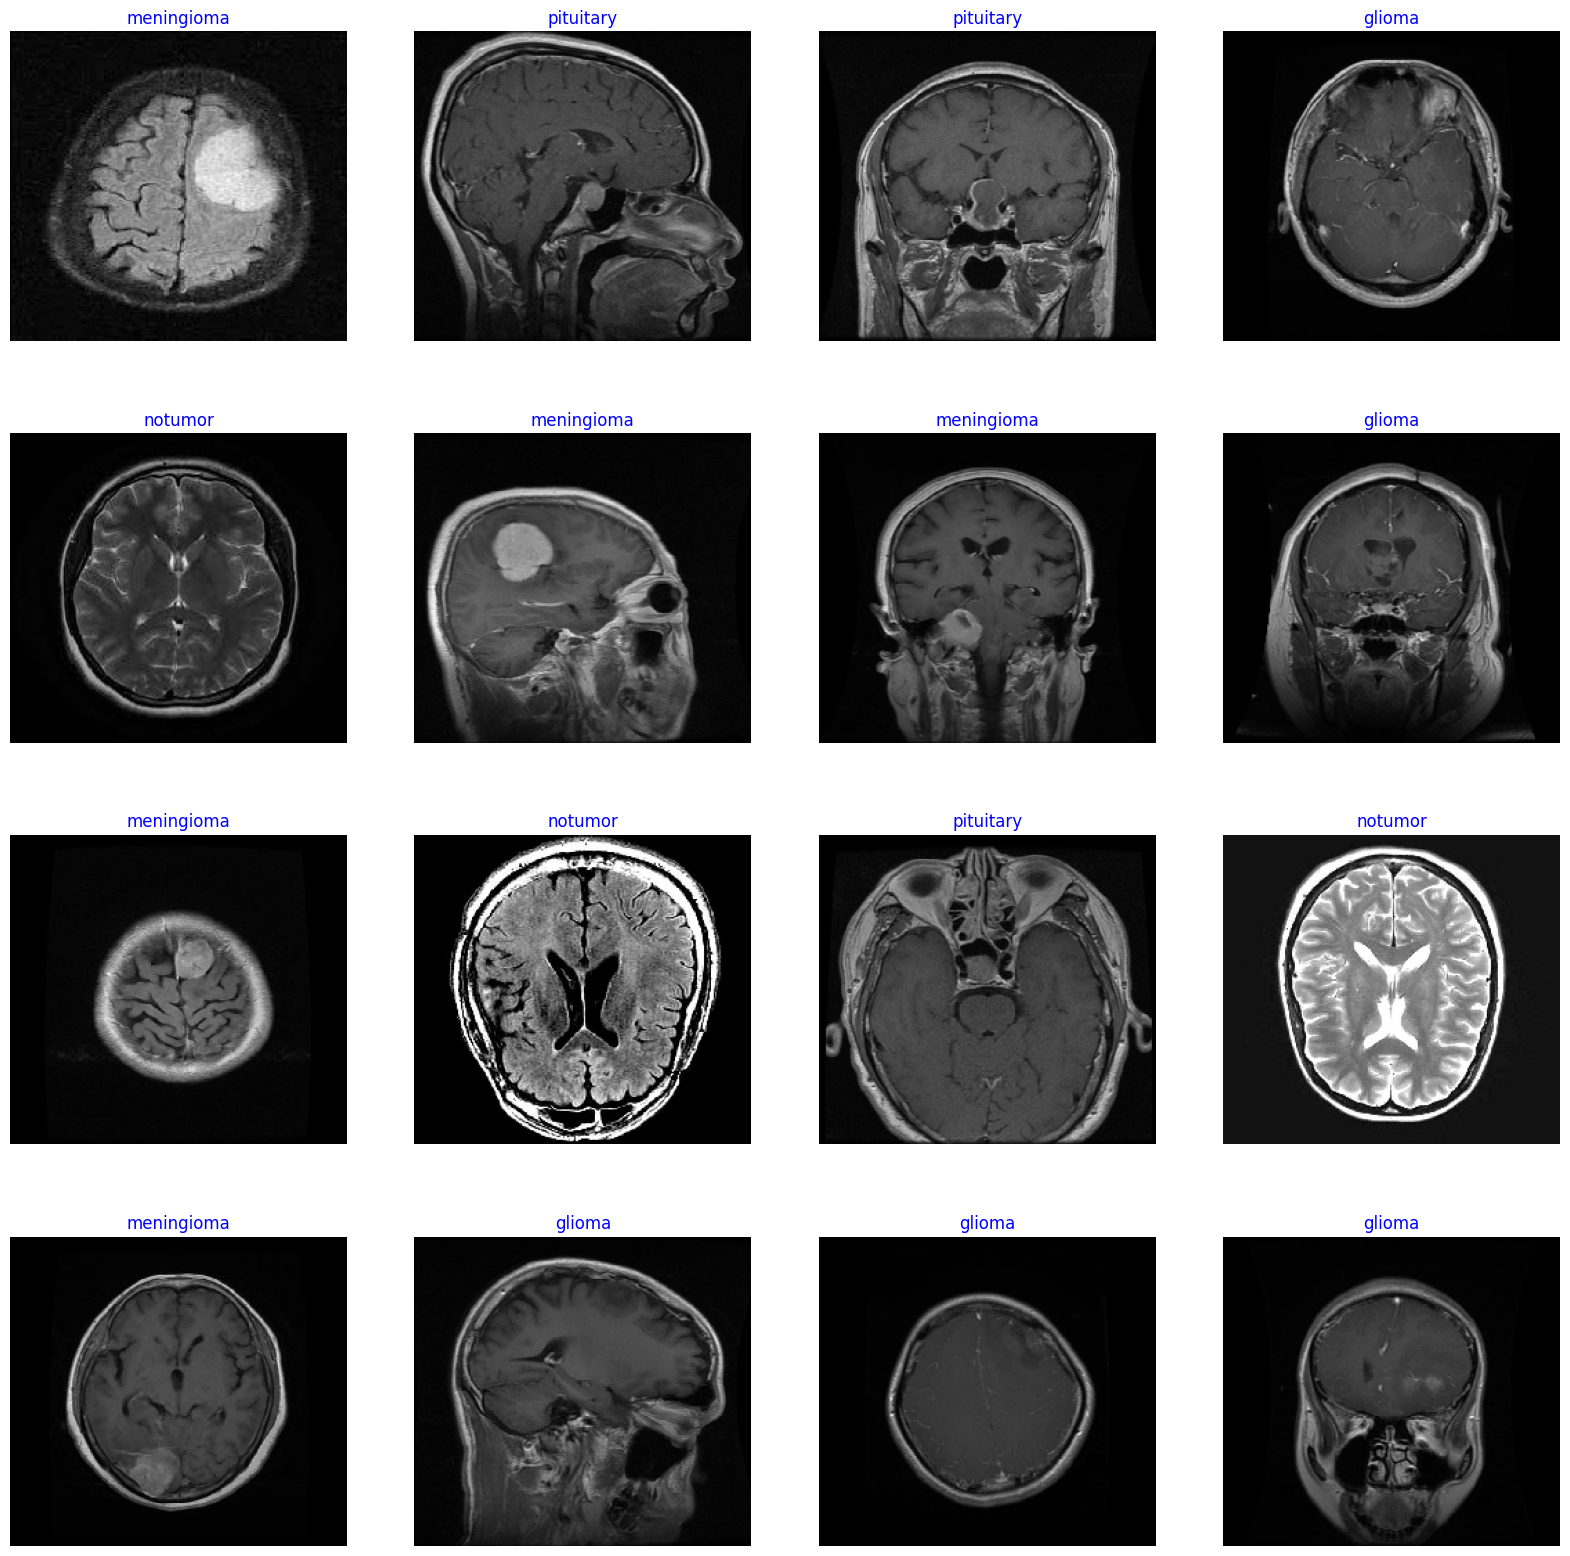

In [9]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize = (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color = "blue", fontsize = 12)
    plt.axis("off")
plt.show();

In [10]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top = False , weights = 'imagenet',
    input_shape = img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,253,396 (23.85 MB)

 Trainable params: 6,190,228 (23.61 MB)

 Non-trainable params: 63,168 (246.75 KB)

training model

In [11]:
Epochs = 10

history = model.fit(
    train_gen,
    epochs=Epochs,
    verbose=1,
    validation_data=valid_gen,
    shuffle=True
)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 149s 158ms/step - accuracy: 0.5087 - loss: 10.3762 - val_accuracy: 0.3299 - val_loss: 5.5302
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.3071 - loss: 5.0433 - val_accuracy: 0.3180 - val_loss: 3.7518
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.3084 - loss: 3.4539 - val_accuracy: 0.3151 - val_loss: 2.5765
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.4449 - loss: 2.3943 - val_accuracy: 0.5340 - val_loss: 1.8949
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.5130 - loss: 1.8458 - val_accuracy: 0.5399 - val_loss: 1.5383
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.5237 - loss: 1.5152 - val_accuracy: 0.5488 - val_loss: 1.2647
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.5450 - loss: 1.2467 - val_accuracy: 0.7456 - val_loss: 1.0509
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.7398 - loss: 1

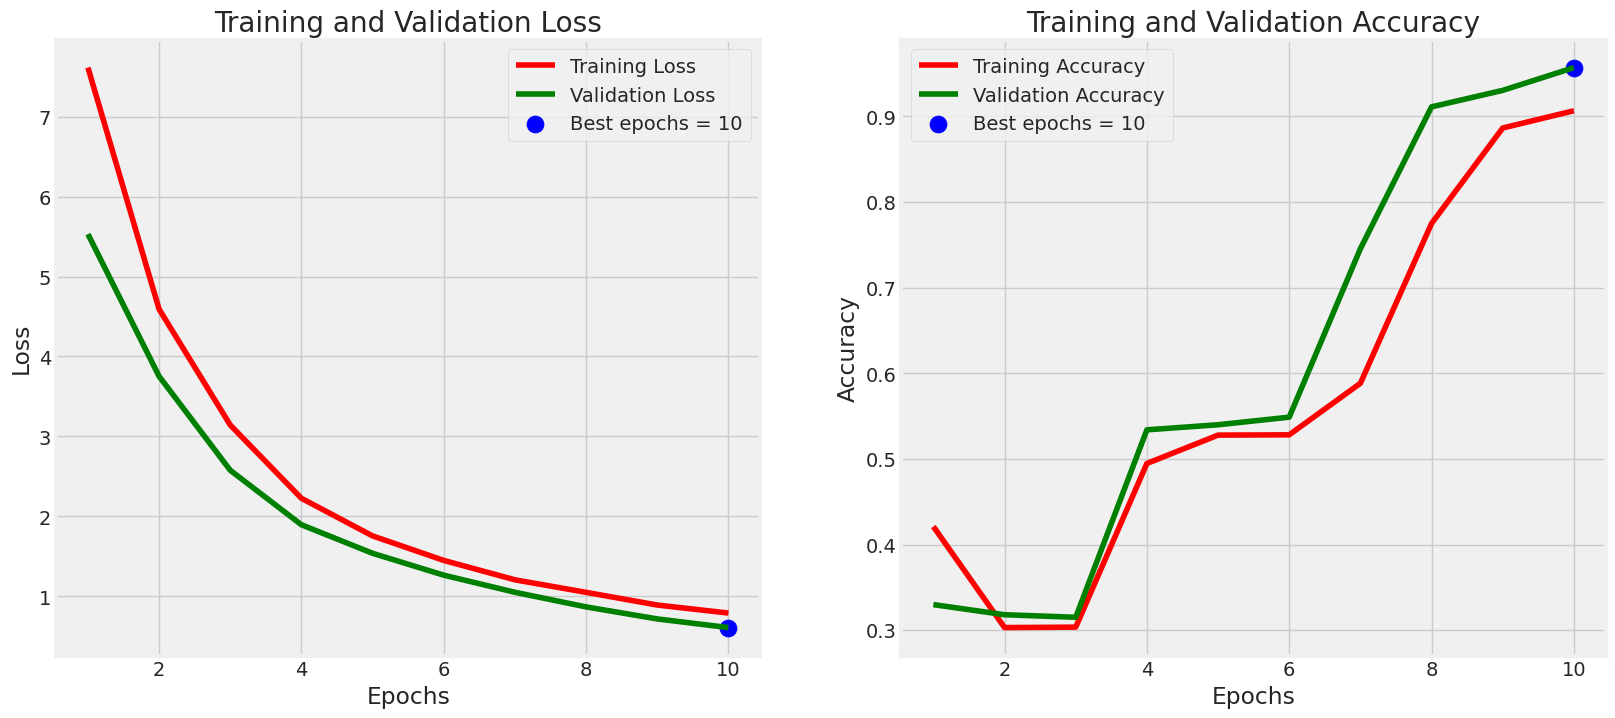

In [12]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [13]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9588 - loss: 0.6040
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9772 - loss: 0.5915
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9682 - loss: 0.6014
Train Loss:  0.6067060828208923
Train Accuracy:  0.96484375
--------------------
Validation Loss:  0.5960826277732849
Validation Accuracy:  0.97265625
--------------------
Test Loss:  0.6036921143531799
Test Accuracy:  0.96875


In [14]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 505ms/step


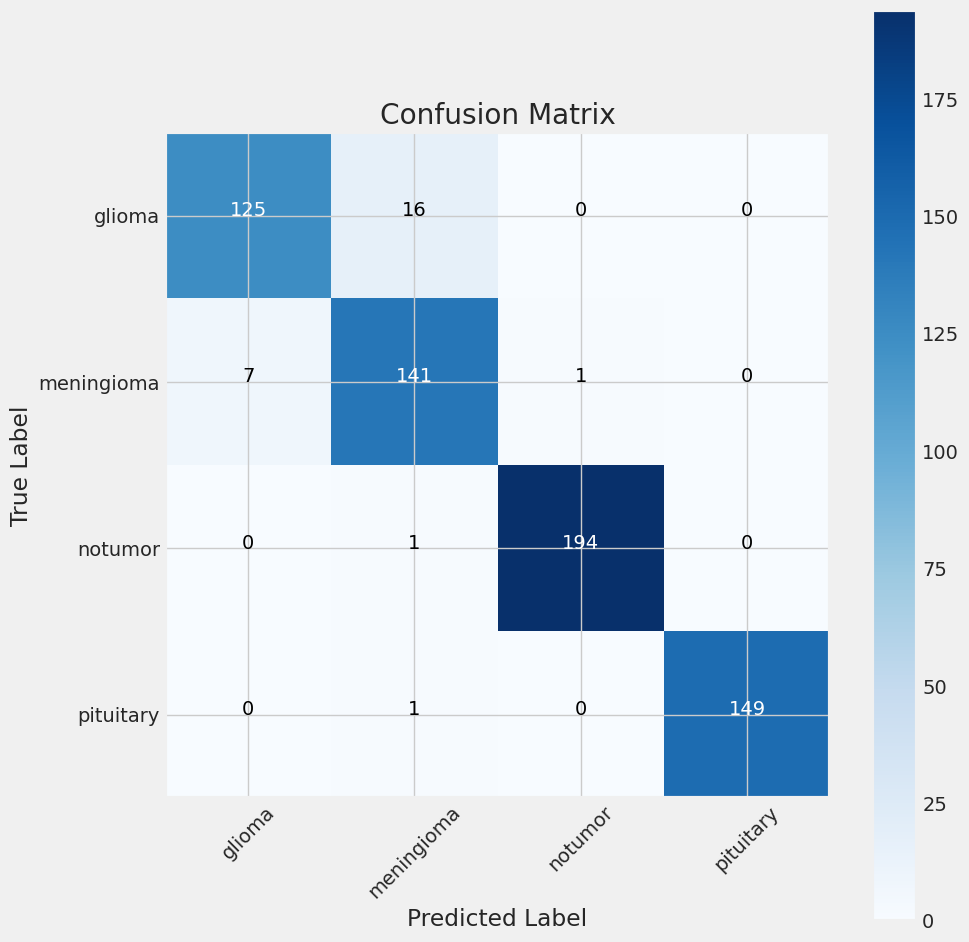

In [15]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [16]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.95      0.89      0.92       141
  meningioma       0.89      0.95      0.92       149
     notumor       0.99      0.99      0.99       195
   pituitary       1.00      0.99      1.00       150

    accuracy                           0.96       635
   macro avg       0.96      0.96      0.96       635
weighted avg       0.96      0.96      0.96       635



# model saving

In [17]:
model.save("model.h5")

In [18]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [19]:
model = load_model('model.h5', compile=False)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
gambar = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/dataset/Testing/glioma/Te-glTr_0000.jpg', target_size=img_size)

In [21]:
input_arr = tf.keras.preprocessing.image.img_to_array(gambar)

In [22]:
input_arr = np.array([input_arr])
prediksi = model.predict(input_arr)
predicted_class = np.argmax(prediksi, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


In [ ]:
print(predicted_class)

In [23]:
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [24]:
names = [classes[i] for i in predicted_class]
print(names)

['glioma']
